In [9]:
import time
import random
import matplotlib.pyplot as plt

# 1. Замер времени выполнения count_occurrences
def measure_occurrences_time():
    ranges = [10, 100, 1000, 10000]
    results = []

    for p in ranges:
        b, a = random.randint(1, p), random.randint(1, p)  
        total_time = 0
        iterations = 100

        for _ in range(iterations):
            start_time = time.time()
            count_occurrences(b, p, a)
            total_time += time.time() - start_time

        results.append((p, total_time / iterations))
    return results

# 2. Замер времени выполнения gray_code
def gray_mt():
    ranges = [2, 4, 6, 8, 10]
    results = []

    for N in ranges:
        total_time = 0
        iterations = 100

        for _ in range(iterations):
            start_time = time.time()
            gray_code(N)
            total_time += time.time() - start_time

        results.append((N, total_time / iterations))
    return results

# 3. Замер времени выполнения f_sqrt_bs
def measure_sqrt_binary_search_time():
    ranges = [10, 100, 1000, 10000, 100000, 1000000]
    results = []

    for x in ranges:
        total_time = 0
        iterations = 100

        for _ in range(iterations):
            start_time = time.time()
            f_sqrt_bs(x)
            total_time += time.time() - start_time

        results.append((x, total_time / iterations))
    return results


In [10]:
def count_occurrences(b, p, a):
    count = 0
    for c in range(1, p): 
        if (b * c) % p == a:  
            count += 1
    return count

# Пример использования:
b, p, a = 7, 13, 5
print(f"Число {a} встречается {count_occurrences(b, p, a)} раз среди значений ({b} * c) mod {p}")


Число 5 встречается 1 раз среди значений (7 * c) mod 13


In [11]:
def gray_code(N):
    codes = []
    for i in range(2 ** N):  
        gray = i ^ (i >> 1)  
        codes.append(format(gray, f'0{N}b'))  
    return codes

# Пример использования:
N = 3
print(f"Коды Грея для {N}-битных чисел: {gray_code(N)}")


Коды Грея для 3-битных чисел: ['000', '001', '011', '010', '110', '111', '101', '100']


In [12]:
def f_sqrt_bs(x):
    if x < 0:
        raise ValueError("Отрицал не берем.")
    if x == 0 or x == 1:
        return x
    
    left, right = 0, x
    result = 0

    while left <= right:
        mid = (left + right) // 2
        square = mid * mid

        if square == x:
            return mid
        elif square < x:
            result = mid  
            left = mid + 1
        else:
            right = mid - 1

    return result

# Пример использования:
x = 50
print(f"Округленный вниз квадратный корень {x}: {f_sqrt_bs(x)}")


Округленный вниз квадратный корень 50: 7


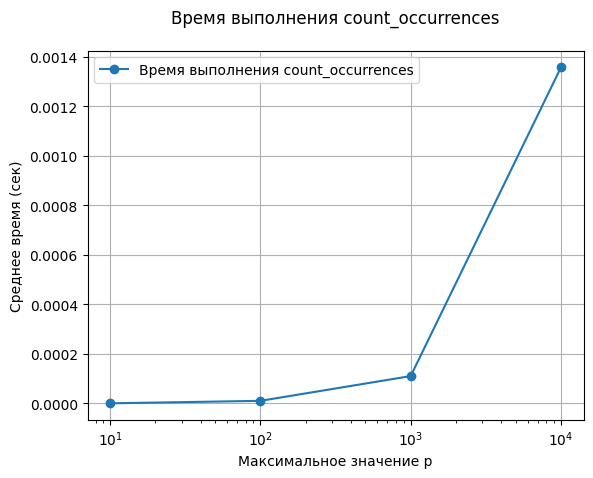

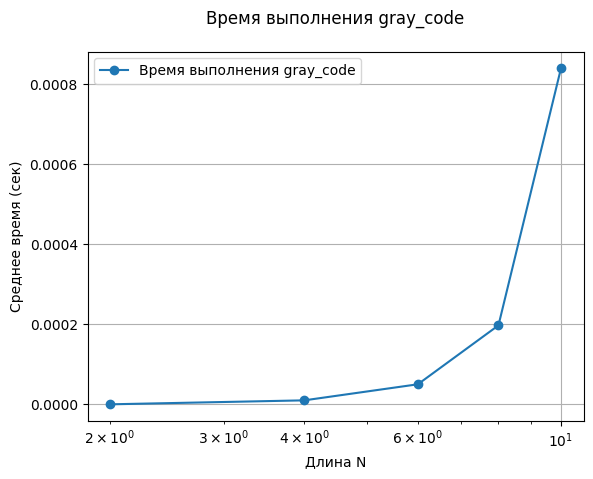

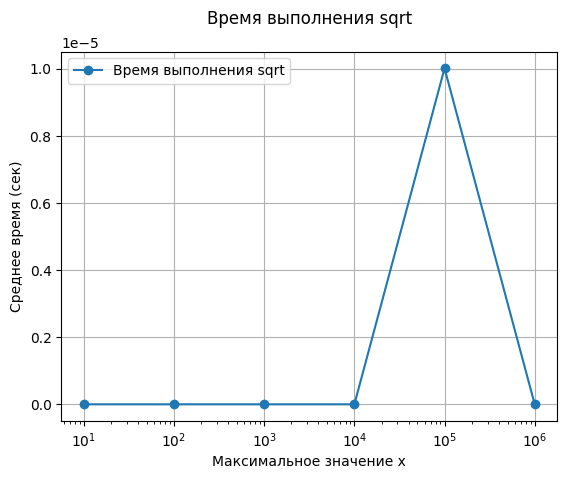

In [13]:
def plot_results(results, title, xlabel, ylabel):
    sizes, times = zip(*results)
    plt.plot(sizes, times, marker="o", label=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc="center", pad=20)
    plt.xscale("log")
    plt.grid(True)
    plt.legend()
    plt.show()


occurrences_results = measure_occurrences_time()
gray_code_results = gray_mt()
sqrt_results = measure_sqrt_binary_search_time()

plot_results(occurrences_results, "Время выполнения count_occurrences", "Максимальное значение p", "Среднее время (сек)")
plot_results(gray_code_results, "Время выполнения gray_code", "Длина N", "Среднее время (сек)")
plot_results(sqrt_results, "Время выполнения sqrt", "Максимальное значение x", "Среднее время (сек)")
